# LCPB 22-23 Exercise 4 (XGBoost) 



<center><h1>Group 2307</h1></center>


<center><style>
table {
    font-size: 24px;
}
</style></center>

| Last Name          | First Name            |Matricola number|
|--------------------|-----------------------|----------------|
| Bertinelli         | Gabriele              |1219907 (tri)   |
| Cacciola           | Martina               |2097476         |
| Pervysheva         | Yelyzaveta            |2039398         |           
| Waththe Liyanage   | Wageesha Widuranga    |2078719         |



In [1]:
import numpy as np
import matplotlib.pyplot as plt
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams['font.size'] = 14

In [2]:
# XGBoost 
import xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, to_graphviz, plot_tree
from sklearn.metrics import mean_squared_error
print("XGBoost version:",xgboost.__version__)


XGBoost version: 1.6.2


In [3]:
import keras, sklearn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2, rmsprop_v2, nadam_v2, adamax_v2
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier

In [5]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
warnings.filterwarnings("ignore")


In [99]:
np.random.seed(123)

CASE = 2

S = 2
N = 2000
N_train = 1000
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
    if CASE==1:
        if x[n,1]<-0.6 and x[n,0]>-0.2: y[n]=1
        if x[n,1]>0.4 and x[n,0]<-0.8: y[n]=1
        if x[n,1]>1.0 and x[n,0]>0.8: y[n]=1
    elif CASE==2:
        if x[n,1]<0 and x[n,0]>0.5: y[n]=1
        if x[n,1]>0 and np.sqrt((x[n,0]+0.3)**2+x[n,1]**2)<1.5: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]

The x-axis is labeled "f0" and the y-axis is labeled "f1". The s parameter determines the size of the plotted points, and the cmap parameter determines the color map used for the points.

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 1
[ 0.87787588 -0.30757416] 1
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


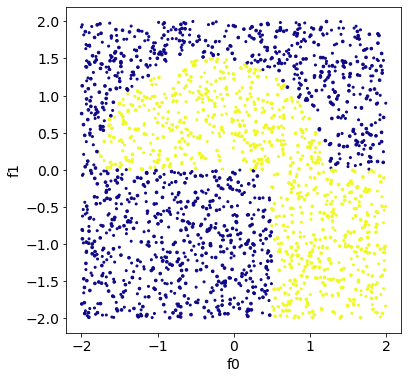

In [100]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="plasma",s=7)
plt.show()

In [101]:
def classify(clf=XGBClassifier(),show=False, use_label_encoder=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        #fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 3.00%


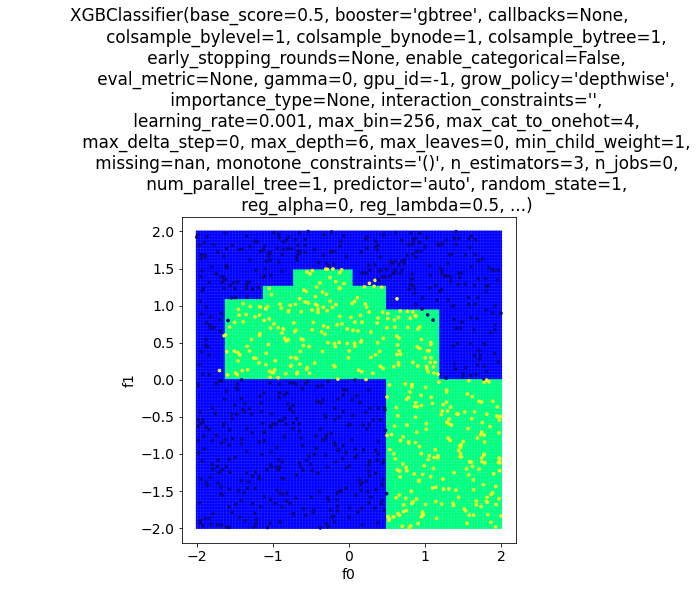

In [102]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       learning_rate=0.001,
                       reg_lambda=0.5, n_estimators=3),show=False)

In [103]:
def fit(xgbr=XGBClassifier(),show=False, verbosity = 0):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    xgbr.fit(x_train,y_train)
    y_hat = xgbr.predict(x_test)
    print("errors: {:.2f}%".format(100*(1-xgbr.score(x_test, y_test))))
    if show: 
        dx = 0.02
        x_seq=np.arange(-S,S+dx,dx)
        nx = len(x_seq)
        x_plot=np.zeros((nx*nx,2))
        q=0
        for i in range(nx):
            for j in range(nx):
                x_plot[q,:] = [x_seq[i],x_seq[j]]
                q+=1
        y_plot= xgbr.predict(x_plot)

        plt.figure(figsize=(9.5,8))
        plt.title(str(xgbr))
        scat(x_plot,y_plot,cmap="winter",s=0.2)
        plt.colorbar()
        scat(x_train,y_train,s=7)
        plt.show()
    if show:      
        dump_list = xgbr.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(xgbr, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-fit.png", dpi=300, pad_inches=0.02)   
        plt.show()
        #plt.savefig("net"+str(t)+".png",dpi=300)
        plt.show()

# Changing Parameters

In [104]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def find(parameter_name, possible_values, params_in_use, X_train, y_train, X_test, y_test):
    best_parameter = 0
    best_accuracy = 0
    best_params = params_in_use.copy()

    for value in possible_values:
        current_params = best_params.copy()
        current_params[parameter_name] = value

        model = xgb.XGBClassifier(**current_params)
        model.fit(X_train, y_train,eval_metric='logloss')

        y_pred = model.predict(X_test)
        current_accuracy = accuracy_score(y_test, y_pred)

        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_parameter = value
            best_params = current_params
        print(value, current_accuracy)    
        
    print(f"Best accuracy: {best_accuracy} with {parameter_name} = {best_parameter}")
    params_in_use[parameter_name] = best_parameter
    return params_in_use

params= {'gamma':0.1,'lambda':0.1,'n_estimators':100,'max_depth':6,'learning_rate':0.1}

Based on the given results, the simplest yet effective XGBoost model that keeps a good accuracy is achieved with the following parameters:

- n_estimators = 100
- max_depth = 6
- objective = reg:squarederror
- gamma = 0.1
- lambda = 5.0
- learning_rate = 0.05

These parameters give an accuracy of 0.984, which is the highest among all the parameter combinations listed. Which  show as smallest value of gamma

In [105]:
gamma_list = [0.1,1.,2.,4.,10.,20.,40.,100.,200]
lmb_list = [100.,30.,20.,8.,5.,4.2, 4.1, 3.7, 3.8,1.,0.5,0.1]
nest_list = [10,50,100,500,1000]
depths_list = [3,6,10]
obj_list = ['reg:squarederror', 'reg:logistic', 'reg:squaredlogerror','binary:logistic']
ler_list=[0.01,0.1,0.05]

parameter_name = ['n_estimators','max_depth','objective','gamma','lambda','learning_rate']
possible_values = [nest_list,depths_list,obj_list,gamma_list,lmb_list,ler_list]
l = len(parameter_name)

#simple search
par_name_found, par_value_found = ['0']*l, [0]*l
for (i,parameter_name,possible_values) in zip(range(l),parameter_name,possible_values):
    print('*******',parameter_name,'*******')
    params_in_use = find(parameter_name, possible_values, params,x_train, y_train, x_test, y_test)

******* n_estimators *******
10 0.972
50 0.979
100 0.98
500 0.98
1000 0.98
Best accuracy: 0.98 with n_estimators = 100
******* max_depth *******
3 0.979
6 0.98
10 0.98
Best accuracy: 0.98 with max_depth = 6
******* objective *******
reg:squarederror 0.981
reg:logistic 0.98
reg:squaredlogerror 0.976
binary:logistic 0.98
Best accuracy: 0.981 with objective = reg:squarederror
******* gamma *******
0.1 0.981
1.0 0.973
2.0 0.972
4.0 0.963
10.0 0.956
20.0 0.88
40.0 0.868
100.0 0.581
200 0.581
Best accuracy: 0.981 with gamma = 0.1
******* lambda *******
100.0 0.971
30.0 0.978
20.0 0.978
8.0 0.982
5.0 0.983
4.2 0.982
4.1 0.982
3.7 0.983
3.8 0.982
1.0 0.982
0.5 0.982
0.1 0.981
Best accuracy: 0.983 with lambda = 5.0
******* learning_rate *******
0.01 0.982
0.1 0.983
0.05 0.984
Best accuracy: 0.984 with learning_rate = 0.05


---Summit---
 {'gamma': 0.1, 'lambda': 5.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'objective': 'reg:squarederror'}
errors: 1.60%


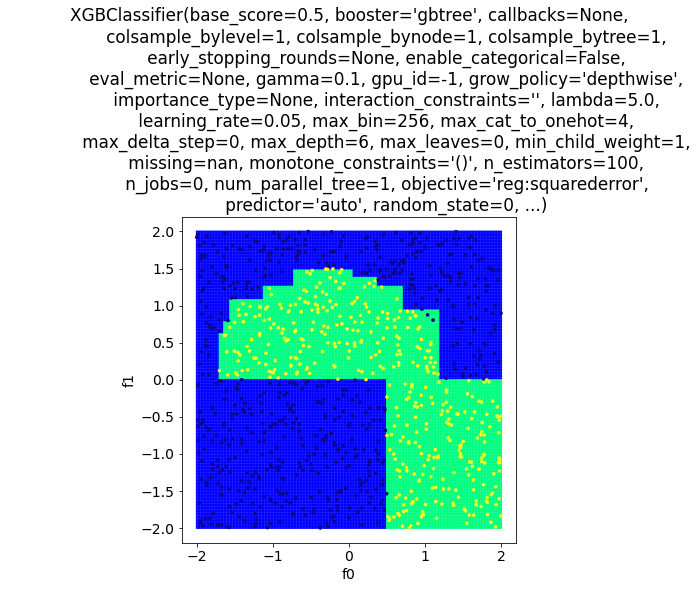

num_trees= 100


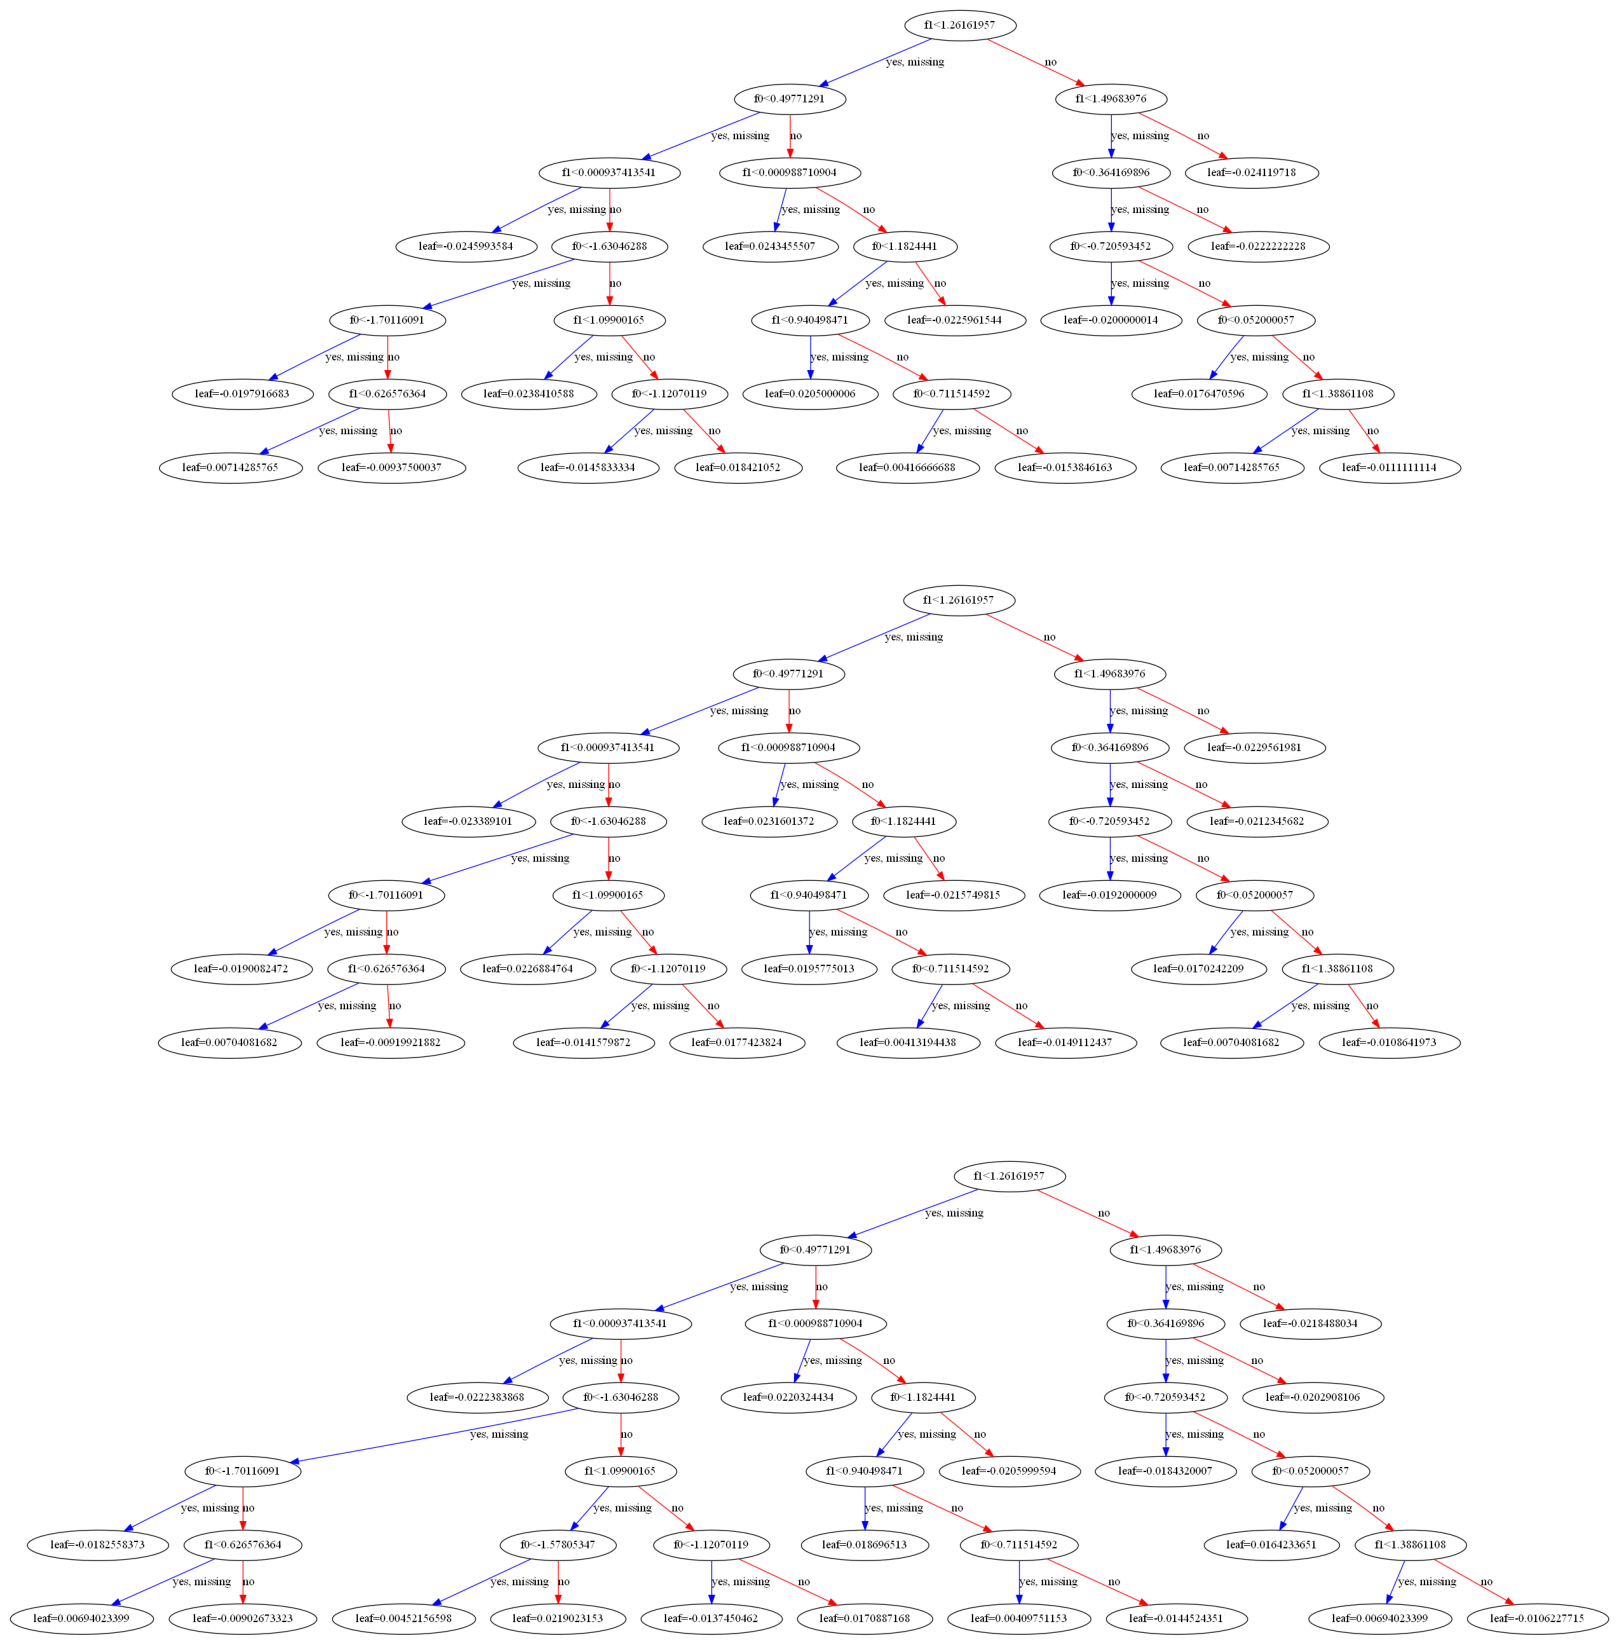

In [106]:
# best_params.pop('0')
print("---Summit---\n", params_in_use)
classify(XGBClassifier(**params_in_use),show=True)

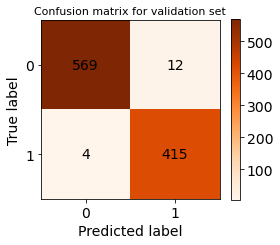

In [118]:
best_model = XGBClassifier(**params_in_use)
best_fit = best_model.fit(x_train,y_train)
# Predicting the labels for the validation set
y_pred = best_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

# Computing the confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
plt.title('Confusion matrix for validation set', fontsize=11)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.imshow(cm, cmap='Oranges', interpolation='nearest')
plt.colorbar(shrink=0.83)
plt.xticks([0,1], ['0', '1'])
plt.yticks([0,1], ['0', '1'])

# Adding the number of predictions to each cell
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(cm[i,j]), ha='center', va='center', color='black')

plt.show()

## Task 1

### DNN

Deep neural networks (DNNs) and XGBoost are both powerful machine learning algorithms . However, there are some differences between them.

One important difference is the way they are structured. DNNs are a type of neural network that consists of multiple layers of interconnected nodes, while XGBoost is a gradient boosting algorithm that combines multiple weak learners (usually decision trees) into a single strong learner.

In terms of training time, DNNs can take longer to train than XGBoost, especially for very large datasets. This is because DNNs require a lot of data and computational resources to train effectively. On the other hand, XGBoost is generally faster to train because it uses an ensemble of weak learners, which can be trained in parallel.

However, the accuracy of DNNs and XGBoost can be very similar, and in some cases,  but usually XGBoost can even outperform DNNs. This is because DNNs are able to learn complex non-linear relationships in the data, which can be difficult for XGBoost to capture.

In [111]:
def Rescaling(x):
    X = x/S
    return X

x_train = Rescaling(x_train)
x_test = Rescaling(x_test)

In [112]:
# Creating and training the NN model w/ our best parameters
L=2
best_activation = "relu"
best_optimizer = adam_v2.Adam()
best_batch_size = 128
best_dropout_rate = 0.3

epochs = 450

best_model = Sequential() 

activation = best_activation
best_model.add(Dense(L, input_shape=(L,), activation=activation))
best_model.add(Dense(20, activation=activation))  
best_model.add(Dense(20, activation=activation))

dropout_rate = best_dropout_rate
best_model.add(Dropout(dropout_rate))
best_model.add(Dense(1, activation='sigmoid'))

optimizer = best_optimizer

best_model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

batch_size = best_batch_size


# Fitting again with more data
fit = best_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=False)

The best test accuracy is 0.983
The error score is 0.017


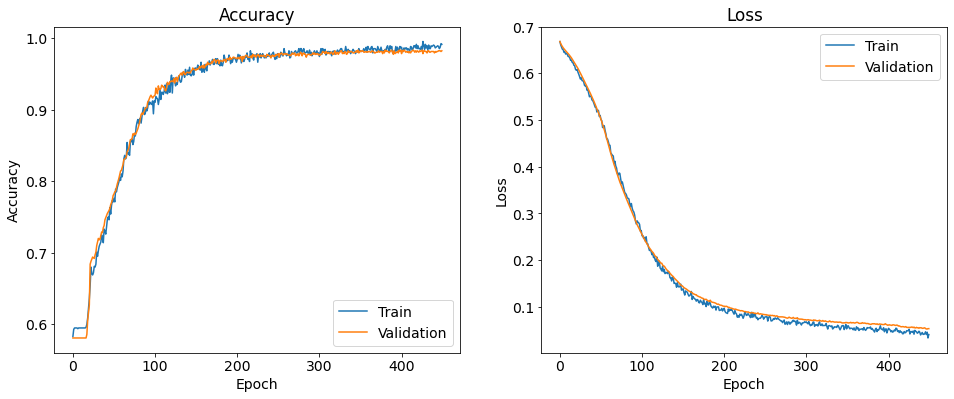

In [113]:
# Printing the max validation accuracy value
max_val_acc = np.max(fit.history['val_accuracy'])
print('The best test accuracy is %.3f' %(max_val_acc))
print('The error score is %.3f' %(1-np.max(fit.history['val_accuracy'])))

# Creating the plot
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Accuracy in training and validation
ax1.plot(fit.history['accuracy'])
ax1.plot(fit.history['val_accuracy'])

# Setting labels and legend
ax1.set_title('Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'])

# Loss in training and validation
ax2.plot(fit.history['loss'])
ax2.plot(fit.history['val_loss'])

# Setting labels and legend
ax2.set_title('Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'])

plt.show()

32/32 [==============================] - 0s 2ms/step


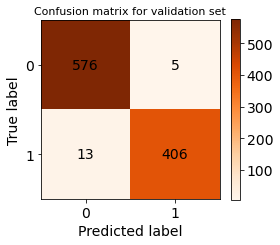

In [114]:
# Predicting the labels for the validation set
y_pred = best_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

# Computing the confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
plt.title('Confusion matrix for validation set', fontsize=11)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.imshow(cm, cmap='Oranges', interpolation='nearest')
plt.colorbar(shrink=0.83)
plt.xticks([0,1], ['0', '1'])
plt.yticks([0,1], ['0', '1'])

# Adding the number of predictions to each cell
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(cm[i,j]), ha='center', va='center', color='black')

plt.show()